### Time Series Analysis and Forecasting

In [1]:
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
start_date = "2014-09-19"
end_date = "2022-06-03"

In [4]:
ticker = 'BABA' #Alibaba group

In [5]:
df = yf.download(ticker,start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000
2014-09-26,89.730003,90.459999,88.660004,90.459999,90.459999,18340000
2014-09-29,89.620003,89.699997,88.019997,88.750000,88.750000,25302000
2014-09-30,89.000000,90.879997,88.459999,88.849998,88.849998,24419400
2014-10-01,88.699997,88.940002,86.040001,86.099998,86.099998,24029600


In [8]:
#drop unnecessary column
df.drop(columns=['Open','High','Low','Close','Volume'], inplace=True, axis=1)

In [9]:
df.head(10)

,Adj Close
Date,
2014-09-19,93.889999
2014-09-22,89.889999
2014-09-23,87.169998
2014-09-24,90.570000
2014-09-25,88.919998
2014-09-26,90.459999
2014-09-29,88.750000
2014-09-30,88.849998
2014-10-01,86.099998


In [10]:
#to change the index column
df1 = df.reset_index()
df1.head(10)

,Date,Adj Close
0,2014-09-19,93.889999
1,2014-09-22,89.889999
2,2014-09-23,87.169998
3,2014-09-24,90.570000
4,2014-09-25,88.919998
5,2014-09-26,90.459999
6,2014-09-29,88.750000
7,2014-09-30,88.849998
8,2014-10-01,86.099998
9,2014-10-02,87.059998


In [11]:
df1.isnull().sum()

Date         0
Adj Close    0
dtype: int64

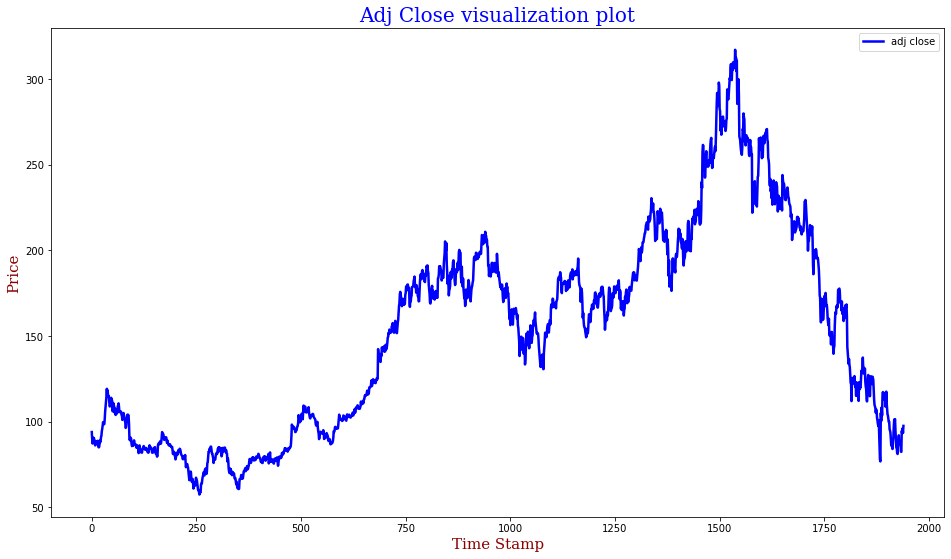

In [12]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(df1['Adj Close'].dropna(),linewidth = 2.5,color='blue',label='adj close')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Adj Close visualization plot",fontdict = font1)
plt.xlabel("Time Stamp",fontdict = font2)
plt.ylabel("Price",fontdict = font2)
plt.legend()
plt.show()

In [13]:
#check if close series is stationary
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_test(df1["Adj Close"])

ADF Statistics: -1.1534751922432536
p- value: 0.6932827395598636
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

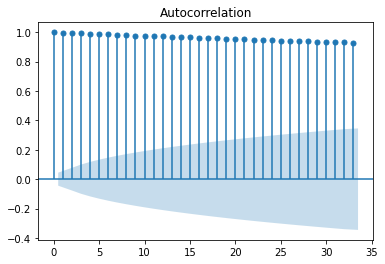

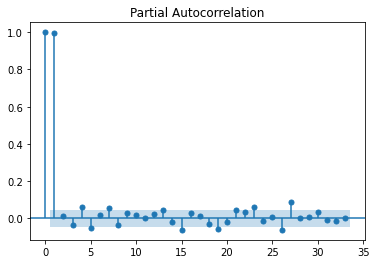

In [17]:
plot_acf(df1["Adj Close"]),plot_pacf(df1["Adj Close"])

In [18]:
#taking log return lpg(pt/pt-1)
df1['Log Return'] = np.log(df1['Adj Close']/df1['Adj Close'].shift(1))

In [19]:
df1.head(10)

,Date,Adj Close,Log Return
0,2014-09-19,93.889999,NaN
1,2014-09-22,89.889999,-0.043537
2,2014-09-23,87.169998,-0.030726
3,2014-09-24,90.570000,0.038263
4,2014-09-25,88.919998,-0.018386
5,2014-09-26,90.459999,0.017171
6,2014-09-29,88.750000,-0.019084
7,2014-09-30,88.849998,0.001126
8,2014-10-01,86.099998,-0.031440
9,2014-10-02,87.059998,0.011088


In [20]:
#omit the NaN value
df2 = df1.iloc[1:]

In [21]:
df2.head(10)

,Date,Adj Close,Log Return
1,2014-09-22,89.889999,-0.043537
2,2014-09-23,87.169998,-0.030726
3,2014-09-24,90.570000,0.038263
4,2014-09-25,88.919998,-0.018386
5,2014-09-26,90.459999,0.017171
6,2014-09-29,88.750000,-0.019084
7,2014-09-30,88.849998,0.001126
8,2014-10-01,86.099998,-0.031440
9,2014-10-02,87.059998,0.011088
10,2014-10-03,88.099998,0.011875


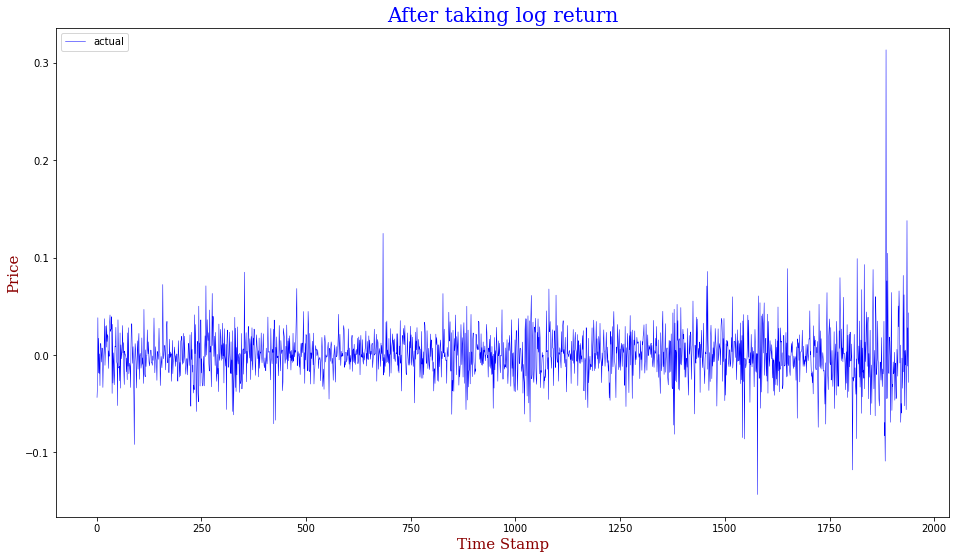

In [22]:
### Plotting 
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(df2["Log Return"].dropna(),linewidth = 0.5,color='blue',label='actual')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("After taking log return",fontdict = font1)
plt.xlabel("Time Stamp",fontdict = font2)
plt.ylabel("Price",fontdict = font2)
plt.legend()
plt.show()

In [23]:
#ADF test after taking log return
adf_test(df2["Log Return"])

ADF Statistics: -19.253540528280652
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

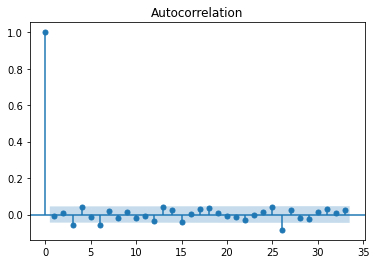

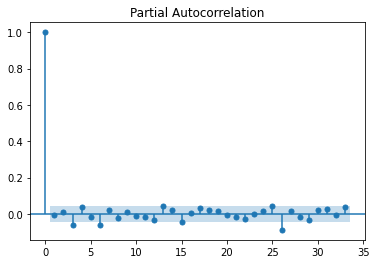

In [24]:
plot_acf(df2["Log Return"]),plot_pacf(df2["Log Return"])

In [25]:
##splitting dataset into train and test split
training_size=int(len(df2["Log Return"])*0.7)
test_size=len(df2["Log Return"])-training_size
train_data,test_data=df2["Log Return"][:training_size],df2["Log Return"][training_size:len(df2["Log Return"])]

In [26]:
train_data.size,test_data.size

(1357, 582)

In [27]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA=ARIMA(train_data,order=(2,0,2))

In [28]:
model_Arima_fit=model_ARIMA.fit()

In [29]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Log Return   No. Observations:                 1357
Model:                     ARMA(2, 2)   Log Likelihood                3390.293
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sun, 05 Jun 2022   AIC                          -6768.586
Time:                        06:54:32   BIC                          -6737.308
Sample:                             0   HQIC                         -6756.876
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0006      0.001      1.090      0.276      -0.000       0.002
ar.L1.Log Return    -0.9552      0.099     -9.600      0.000      -1.150      -0.760
ar.L2.Log Return    -0.7650      0.111     -6.874      0.000      -0.983      -0.547
ma.L1.Log Return     1.0368      0.085     12.155      0.000       0.870       1.204
ma.L2.Log Return     0.8165      0.102      7.969      0.000       0.616       1.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6243           -0.9578j            1.1433           -0.3419
AR.2           -0.6243           +0.9578j            1.1433            0.3419
MA.1           -0.6349           -0.9065j            1.1067           -0.3472
MA.2           -0.6349           +0.9065j            1.1067            0.3472
-----------------------------------------------------------------------------
"""

In [30]:
st = len(train_data)
ed = st+len(test_data)-1
st,ed

(1357, 1938)

In [31]:
ed-st

581

In [32]:
# make prediction
pred=model_Arima_fit.predict(start=st,end=ed)

In [33]:
pred[:25]

1358    0.002382
1359    0.000102
1360   -0.000239
1361    0.001831
1362    0.000114
1363    0.000171
1364    0.001430
1365    0.000184
1366    0.000411
1367    0.001147
1368    0.000270
1369    0.000544
1370    0.000953
1371    0.000353
1372    0.000614
1373    0.000824
1374    0.000424
1375    0.000645
1376    0.000740
1377    0.000480
1378    0.000656
1379    0.000687
1380    0.000523
1381    0.000656
1382    0.000654
dtype: float64

In [34]:
test_data[:25]

1358    0.032164
1359   -0.017766
1360   -0.003318
1361    0.004044
1362    0.007319
1363   -0.018629
1364   -0.025313
1365   -0.030713
1366   -0.002671
1367    0.015108
1368   -0.017933
1369    0.014382
1370    0.014225
1371   -0.017066
1372    0.021700
1373   -0.002362
1374   -0.032784
1375   -0.034704
1376    0.043219
1377   -0.036915
1378   -0.071956
1379    0.046962
1380   -0.081311
1381    0.032781
1382   -0.026371
Name: Log Return, dtype: float64

In [35]:
#taking exponential of predicted value
pred_exp = np.exp(pred)

In [36]:
pred_exp[:25]

1358    1.002384
1359    1.000102
1360    0.999761
1361    1.001832
1362    1.000114
1363    1.000171
1364    1.001431
1365    1.000184
1366    1.000411
1367    1.001148
1368    1.000270
1369    1.000545
1370    1.000954
1371    1.000353
1372    1.000614
1373    1.000824
1374    1.000424
1375    1.000645
1376    1.000740
1377    1.000480
1378    1.000656
1379    1.000687
1380    1.000523
1381    1.000656
1382    1.000654
dtype: float64

In [37]:
#taking exponential of test data value
test_exp = np.exp(test_data)

In [38]:
test_exp[:25]

1358    1.032687
1359    0.982390
1360    0.996687
1361    1.004052
1362    1.007346
1363    0.981543
1364    0.975005
1365    0.969754
1366    0.997332
1367    1.015223
1368    0.982227
1369    1.014486
1370    1.014327
1371    0.983079
1372    1.021937
1373    0.997641
1374    0.967748
1375    0.965891
1376    1.044167
1377    0.963758
1378    0.930572
1379    1.048082
1380    0.921907
1381    1.033324
1382    0.973973
Name: Log Return, dtype: float64

In [39]:
#making new data frame
new1 = df1['Adj Close'].iloc[1358:]

In [40]:
new1

1358    224.309998
1359    220.360001
1360    219.630005
1361    220.520004
1362    222.139999
           ...    
1935     94.480003
1936     93.410004
1937     96.050003
1938     93.379997
1939     97.500000
Name: Adj Close, Length: 582, dtype: float64

In [41]:
new1 = pd.DataFrame(new1, columns = ['Adj Close'])

In [42]:
new1

,Adj Close
1358,224.309998
1359,220.360001
1360,219.630005
1361,220.520004
1362,222.139999
...,...
1935,94.480003
1936,93.410004
1937,96.050003
1938,93.379997


In [43]:
new1["test data"] = test_exp

In [44]:
new1

,Adj Close,test data
1358,224.309998,1.032687
1359,220.360001,0.982390
1360,219.630005,0.996687
1361,220.520004,1.004052
1362,222.139999,1.007346
...,...,...
1935,94.480003,1.147856
1936,93.410004,0.988675
1937,96.050003,1.028262
1938,93.379997,0.972202


In [45]:
new1["pred data"] = pred_exp

In [46]:
new1

,Adj Close,test data,pred data
1358,224.309998,1.032687,1.002384
1359,220.360001,0.982390,1.000102
1360,219.630005,0.996687,0.999761
1361,220.520004,1.004052,1.001832
1362,222.139999,1.007346,1.000114
...,...,...,...
1935,94.480003,1.147856,1.000618
1936,93.410004,0.988675,1.000618
1937,96.050003,1.028262,1.000618
1938,93.379997,0.972202,1.000618


In [47]:
new1['actual_test_prod'] = new1['Adj Close']*new1['test data']

In [48]:
new1

,Adj Close,test data,pred data,actual_test_prod
1358,224.309998,1.032687,1.002384,231.642067
1359,220.360001,0.982390,1.000102,216.479561
1360,219.630005,0.996687,0.999761,218.902427
1361,220.520004,1.004052,1.001832,221.413610
1362,222.139999,1.007346,1.000114,223.771895
...,...,...,...,...
1935,94.480003,1.147856,1.000618,108.449414
1936,93.410004,0.988675,1.000618,92.352122
1937,96.050003,1.028262,1.000618,98.764615
1938,93.379997,0.972202,1.000618,90.784212


In [49]:
new1['actual_pred_prod'] = new1['Adj Close']*new1['pred data']

In [50]:
new1

,Adj Close,test data,pred data,actual_test_prod,actual_pred_prod
1358,224.309998,1.032687,1.002384,231.642067,224.844862
1359,220.360001,0.982390,1.000102,216.479561,220.382372
1360,219.630005,0.996687,0.999761,218.902427,219.577574
1361,220.520004,1.004052,1.001832,221.413610,220.924056
1362,222.139999,1.007346,1.000114,223.771895,222.165381
...,...,...,...,...,...
1935,94.480003,1.147856,1.000618,108.449414,94.538379
1936,93.410004,0.988675,1.000618,92.352122,93.467718
1937,96.050003,1.028262,1.000618,98.764615,96.109349
1938,93.379997,0.972202,1.000618,90.784212,93.437693


In [51]:
new1["actual_test_data"] = new1['actual_test_prod']

In [52]:
new1["actual_pred_data"] = new1['actual_pred_prod']

In [53]:
new1

,Adj Close,test data,pred data,actual_test_prod,actual_pred_prod,actual_test_data,actual_pred_data
1358,224.309998,1.032687,1.002384,231.642067,224.844862,231.642067,224.844862
1359,220.360001,0.982390,1.000102,216.479561,220.382372,216.479561,220.382372
1360,219.630005,0.996687,0.999761,218.902427,219.577574,218.902427,219.577574
1361,220.520004,1.004052,1.001832,221.413610,220.924056,221.413610,220.924056
1362,222.139999,1.007346,1.000114,223.771895,222.165381,223.771895,222.165381
...,...,...,...,...,...,...,...
1935,94.480003,1.147856,1.000618,108.449414,94.538379,108.449414,94.538379
1936,93.410004,0.988675,1.000618,92.352122,93.467718,92.352122,93.467718
1937,96.050003,1.028262,1.000618,98.764615,96.109349,98.764615,96.109349
1938,93.379997,0.972202,1.000618,90.784212,93.437693,90.784212,93.437693


In [54]:
new1.drop(columns=['Adj Close','test data','pred data','actual_test_prod','actual_pred_prod'], inplace=True, axis=1)

In [55]:
new1

,actual_test_data,actual_pred_data
1358,231.642067,224.844862
1359,216.479561,220.382372
1360,218.902427,219.577574
1361,221.413610,220.924056
1362,223.771895,222.165381
...,...,...
1935,108.449414,94.538379
1936,92.352122,93.467718
1937,98.764615,96.109349
1938,90.784212,93.437693


In [56]:
new1['actual_test_data'].size,new1['actual_pred_data'].size

(582, 582)

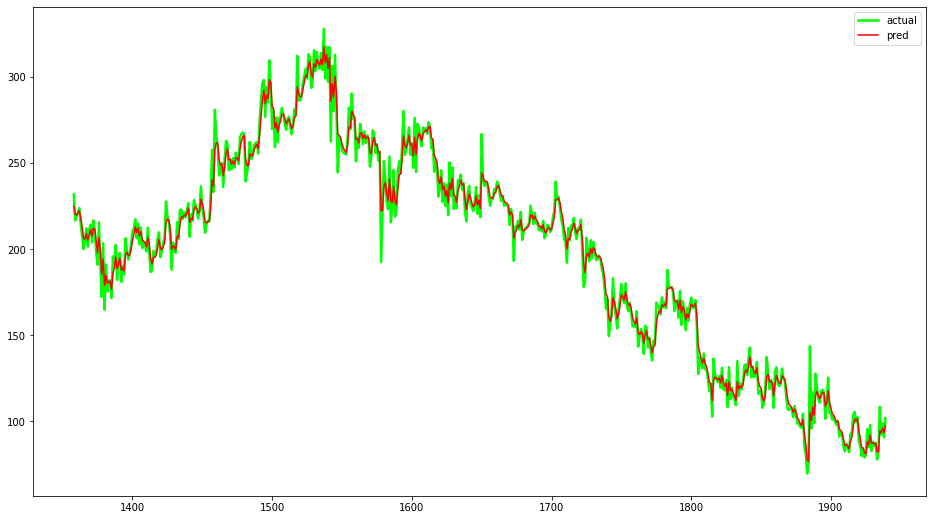

In [57]:
### Plotting 
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)

plt.plot(new1['actual_test_data'],linewidth = 2.5,color='lime',label='actual')
plt.plot(new1['actual_pred_data'],color='red',label='pred')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
mse = (mean_squared_error(new1['actual_test_data'],new1['actual_pred_data']))**(1/2)
mse

5.7530273136761

In [59]:
# make prediction
forecast=model_Arima_fit.predict(start=st,end=ed+50)
forecast

1358    0.002382
1359    0.000102
1360   -0.000239
1361    0.001831
1362    0.000114
          ...   
1985    0.000618
1986    0.000618
1987    0.000618
1988    0.000618
1989    0.000618
Length: 632, dtype: float64

In [60]:
pred_exp3 = np.exp(forecast)

In [61]:
forecastdf = pd.DataFrame(pred_exp3, columns = ['forecast'])
forecastdf

,forecast
1358,1.002384
1359,1.000102
1360,0.999761
1361,1.001832
1362,1.000114
...,...
1985,1.000618
1986,1.000618
1987,1.000618
1988,1.000618


In [62]:
forecastdf['Adj Close'] = df1['Adj Close'].iloc[1358:]
forecastdf

,forecast,Adj Close
1358,1.002384,224.309998
1359,1.000102,220.360001
1360,0.999761,219.630005
1361,1.001832,220.520004
1362,1.000114,222.139999
...,...,...
1985,1.000618,NaN
1986,1.000618,NaN
1987,1.000618,NaN
1988,1.000618,NaN


In [63]:
forecastdf[581:]

,forecast,Adj Close
1939,1.000618,97.5
1940,1.000618,NaN
1941,1.000618,NaN
1942,1.000618,NaN
1943,1.000618,NaN
1944,1.000618,NaN
1945,1.000618,NaN
1946,1.000618,NaN
1947,1.000618,NaN
1948,1.000618,NaN


In [64]:
pred_list = (forecastdf['forecast'].iloc[582:]).tolist()

In [65]:
pred_list

[1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608212446,
 1.0006178608

In [66]:
len(pred_list)

50

In [67]:
adj_close_list = pd.DataFrame(df1['Adj Close'].iloc[1939:], columns = ['Adj Close'])
adj_close_list

,Adj Close
1939,97.5


In [68]:
adj_close_list = adj_close_list['Adj Close'].tolist()
adj_close_list

[97.5]

In [69]:
for i in pred_list:
    predicted= i*adj_close_list[-1]
    adj_close_list.append(predicted)

In [70]:
adj_close_list

[97.5,
 97.56024143007134,
 97.62052008096215,
 97.6808359756697,
 97.74118913720548,
 97.80157958859522,
 97.86200735287885,
 97.92247245311054,
 97.98297491235873,
 98.04351475370606,
 98.1040920002495,
 98.16470667510022,
 98.22535880138373,
 98.2860484022398,
 98.34677550082249,
 98.40754012030018,
 98.46834228385558,
 98.52918201468567,
 98.59005933600183,
 98.65097427102972,
 98.71192684300941,
 98.77291707519527,
 98.83394499085607,
 98.89501061327496,
 98.95611396574948,
 99.01725507159153,
 99.07843395412745,
 99.13965063669798,
 99.20090514265827,
 99.26219749537792,
 99.32352771824095,
 99.38489583464586,
 99.44630186800556,
 99.50774584174746,
 99.56922777931345,
 99.63074770415987,
 99.69230563975758,
 99.75390160959192,
 99.81553563716278,
 99.87720774598453,
 99.93891795958609,
 100.0006663015109,
 100.06245279531696,
 100.12427746457682,
 100.1861403328776,
 100.248041423821,
 100.30998076102328,
 100.37195836811532,
 100.43397426874257,
 100.49602848656512,
 100.558121

In [71]:
len(adj_close_list)

51

In [72]:
adj_close_list.pop(0)

97.5

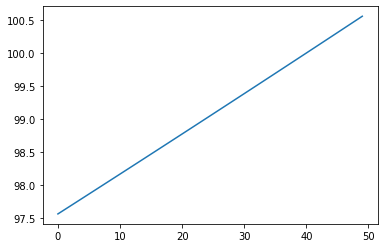

In [73]:
plt.plot(adj_close_list)

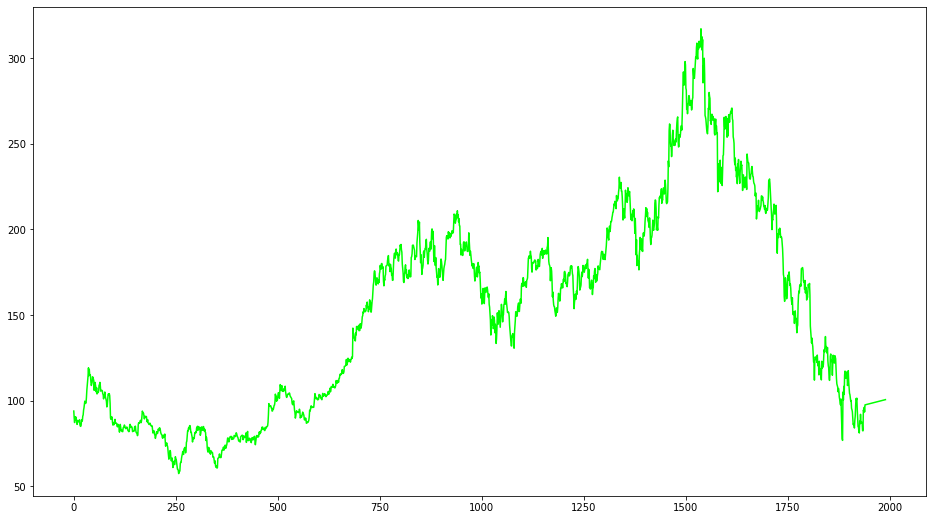

In [74]:
final_set = df1['Adj Close'].tolist()
final_set.extend(adj_close_list)
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(final_set,'lime')
plt.show()

Submitted by,

> Soumitro Mukherjee


Reg. No. : 213001818010030, Roll No. : 30018021030